# CS369 Introduction to Feature Vectors
## In-Class Exercise

In this exercise, we will practice loading and extracting features from images.

We will use a subset of 20 faces from the dataset "Labeled Faces in the Wild" (link below). Each class corresponds to a single person identity, and there are 200 images per person. Each image is size 64 x 64, grayscale only. The goal is to find a feature vector that will effectively group images together belonging to the same person-class.

Link to more information about the dataset: https://vis-www.cs.umass.edu/lfw/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from random import sample, shuffle
from sklearn.datasets import fetch_olivetti_faces
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the Labeled Faces in the Wild dataset
lfw_people = fetch_olivetti_faces()

# We are only going to use the first 20 classes
num_classes = 20

# There are multiple samples per class
# We create a mask for only those samples we want
m = lfw_people.target < num_classes

labels = lfw_people.target[m]
images = lfw_people.images[m, ...] # get all dimensions

# count how many images we have
num_imgs = len(labels)

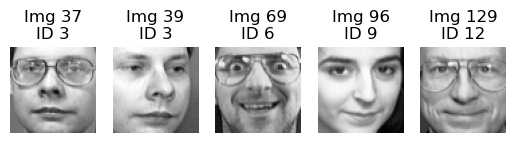

In [ ]:
# Let's inspect our data (always a good idea!)
# Choose a random subset
subcount = 5
ex_ixs = sorted(sample(range(num_imgs), k=subcount))

fig, ax = plt.subplots(nrows=1, ncols=subcount)
for i, j in enumerate(ex_ixs):
    ax[i].imshow(images[j], cmap='gray')
    ax[i].axis('off')
    ax[i].set_title('Img {}\nID {}'.format(j, labels[j]))

plt.show()

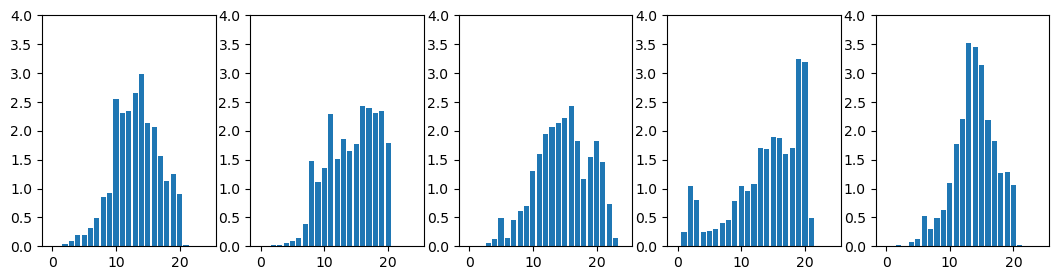

In [ ]:
# Extract features from images

# Example 1: luminance histogram
lumhist_data = []
num_bins = 25
for i in range(num_imgs):
    img_hist, _ = np.histogram(images[i],
                               bins=num_bins,
                               range=(0,1),
                               density=True)
    lumhist_data.append(img_hist)
lumhist_data = np.array(lumhist_data)

# Inspect the histograms for the example images above
fig, ax = plt.subplots(nrows=1, ncols=subcount, figsize=(13,3))
for i,j in enumerate(ex_ixs):
    ax[i].bar(range(num_bins), height=lumhist_data[j])
    ax[i].set_ylim([0, 4])
plt.show()

In [ ]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    lumhist_data,
    labels,
    test_size=0.2,
    stratify=labels,
    random_state=0,
)

# Train a simple KNN Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Report overall test accuracy
print("Overall Test Accuracy: {}".format(neigh.score(X_test, y_test)))

Overall Test Accuracy: 0.85


<Axes: >

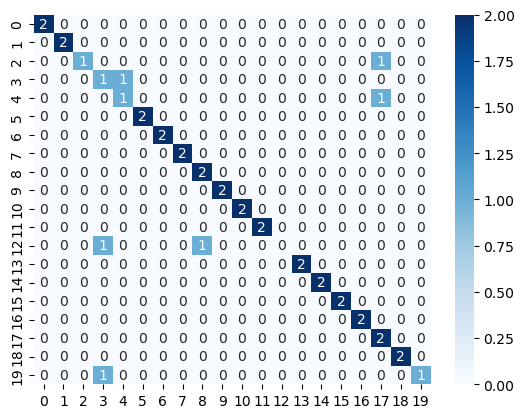

In [ ]:
# Report accuracy for each class
y_pred = neigh.predict(X_test)

# Plot the results as a confusion matrix
C = confusion_matrix(y_test, y_pred)
sn.heatmap(C, annot=True, cmap='Blues')